In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy
import scipy.stats
from scipy.stats import norm
import math
import random
import matplotlib.pyplot as plt
import pickle
from EM import EM
from plot import plot
from scipy import linalg
from numpy import ma

### Data Generation

In [2]:
class Model:
    # num_tseries is the number of time series generated by Model, each is time_length long
    # missing is the probability of an observation missing, default to zero 
    def __init__(self, time_length, num_tseries, missing=0):
        self.T = time_length
        self.num_tseries = num_tseries
        # model parameters
        self.A = np.array([[0]]) # the coefficients a_j's stored in a matrix
        self.b = np.array([10])
        self.num_treatments = self.A.shape[1]
        self.num_chronic = self.b.shape[0]
        # noise are the variance, not standard deviation
        # noise for transition should be larger than noise for observation
        self.noise_0 = 1
        self.noise_1 = 1
        self.noise_2 = .01
        self.init_z = 6
        self.missing = missing
        # simulated data
        self.z = np.zeros((self.num_tseries, self.T))
        self.y = np.zeros((self.num_tseries, self.T))
        self.X = np.zeros((self.num_tseries, self.T, self.num_treatments))
        self.c = np.zeros((self.num_tseries, self.num_chronic))
        self.pi = np.zeros((self.num_tseries, self.T))
        
    def set_X(self, n):
        for t in range(self.T):
            self.X[n, t, :] = np.random.binomial(n=1, p=0.0, size=self.A.shape[1])# np.random.randint(2, size = self.num_treatments)

    def set_c(self, n):
        self.c[n, :] = np.random.binomial(n=1, p=0.5, size=self.num_chronic)#np.random.randint(2, size = self.num_chronic)
        
    def transition(self, prev):
        z = np.random.normal(prev, np.sqrt(self.noise_1), 1)
        return z

    def emission(self, z, n, t):
        treatment_effect = 0
        for j in range(np.shape(self.A)[0]):
            if t-1 >= j:
                treatment_effect += np.dot(self.A[j, :], self.X[n, t-1-j, :])
        pi = treatment_effect + np.dot(self.b, self.c[n, :]) # total added effect
        prob = np.random.uniform(0, 1, 1)
        # to simulate time series we are dealing with, the first and last observations are not missing
        if prob < self.missing and t > 0 and t != self.T-1:
            y = np.nan
        else:
            mean = z + pi
            y = np.random.normal(mean, np.sqrt(self.noise_2), 1)
        return y, pi
    
    def pct_missing(self, n):
        pct = np.shape(np.where(np.isnan(self.y[n, :]))[0])[0]/self.T*100
        print('missing {}% of observations'.format(pct))
    
    # generate a single trajectory indexed n
    def gen_trajectory(self, n):
        self.set_X(n)
        self.set_c(n)
        self.z[n, 0] = np.random.normal(self.init_z, np.sqrt(self.noise_0), 1)
        self.y[n, 0], self.pi[n, 0] = self.emission(self.z[n, 0], n, 0)
        for t in range(1, self.T):
            self.z[n, t] = self.transition(self.z[n, t-1])
            self.y[n, t], self.pi[n, t] = self.emission(self.z[n, t], n, t)
    
    # plot the trajectory indexed n
    def plot_trajectory(self, n):
        times = list(range(self.T))
        fig = plt.figure()
        plt.plot(times, self.y[n, :], label = 'observed')
        plt.plot(times, self.z[n, :], label = 'counterfactual')
        for t in np.nonzero(self.X[n, :, :])[0]:
            plt.axvline(x=t, color='g', linestyle='--')
        plt.xlabel('time (hr)')
        plt.ylabel('INR')
        plt.title('Simulated trajectory')
        plt.legend()
        fig.set_figheight(8)
        fig.set_figwidth(15)
        plt.show()
    
    # generate and plot multiple trajectories 
    def run_simulation(self):
        np.random.seed(0)
        for n in range(self.num_tseries):
            self.gen_trajectory(n)
            #self.plot_trajectory(n)
            #self.pct_missing(n)

In [3]:
%%capture
model = Model(10, 50, 0.0)
model.run_simulation()

In [4]:
%%time
em = EM(model.y, model.X, model.c, model.A.shape[0], 0, train_pct = 1)
num_iter = em.run_EM(10000)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iteration 665
iteration 666
iteration 667
iterat

iteration 1171
iteration 1172
iteration 1173
iteration 1174
iteration 1175
iteration 1176
iteration 1177
iteration 1178
iteration 1179
iteration 1180
iteration 1181
iteration 1182
iteration 1183
iteration 1184
iteration 1185
iteration 1186
iteration 1187
iteration 1188
iteration 1189
iteration 1190
iteration 1191
iteration 1192
iteration 1193
iteration 1194
iteration 1195
iteration 1196
iteration 1197
iteration 1198
iteration 1199
iteration 1200
iteration 1201
iteration 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 1234
iteration 1235
iteration 1236
iteration 

In [5]:
print('initial state variance initialization: {}'.format(round(em.init_0, 5)))
print('chronic initialization: {}'.format(np.round(em.init_b, 5)))
print('estimated initial state variance: {}'.format(round(em.sigma_0, 5)))
print('estimated chronic: {}'.format(np.round(em.b, 5)))

initial state variance initialization: 3e-05
chronic initialization: [-0.00056]
estimated initial state variance: 0.88541
estimated chronic: [11.06352]


In [5]:
%%time
initial_b = [-5, -3, 0, 3, 5, 7, 9, 11, 13, 15, 19]
initial_sigma_0 = [.001]
results = []
for sigma in initial_sigma_0:
    for b in initial_b:
        em = EM(model.y, model.X, model.c, model.A.shape[0], 0, train_pct = 1, single_effect=False, init_A_given=True, init_A=np.zeros_like(model.A),
                init_b_given=True, init_b=np.full_like(model.b, b, dtype=np.float), init_0=sigma, init_1=1, init_2=.01, init_state=6)#, X_prev_given=True, X_prev=X_prev)
        num_iter = em.run_EM(20000)
        results.append([em.init_0, em.init_b, em.sigma_0, em.b])

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iteration 665
iteration 666
iterat

iteration 1172
iteration 1173
iteration 1174
iteration 1175
iteration 1176
iteration 1177
iteration 1178
iteration 1179
iteration 1180
iteration 1181
iteration 1182
iteration 1183
iteration 1184
iteration 1185
iteration 1186
iteration 1187
iteration 1188
iteration 1189
iteration 1190
iteration 1191
iteration 1192
iteration 1193
iteration 1194
iteration 1195
iteration 1196
iteration 1197
iteration 1198
iteration 1199
iteration 1200
iteration 1201
iteration 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 1234
iteration 1235
iteration 1236
iteration 1237
iteration 

iteration 1720
iteration 1721
iteration 1722
iteration 1723
iteration 1724
iteration 1725
iteration 1726
iteration 1727
iteration 1728
iteration 1729
iteration 1730
iteration 1731
iteration 1732
iteration 1733
iteration 1734
iteration 1735
iteration 1736
iteration 1737
iteration 1738
iteration 1739
iteration 1740
iteration 1741
iteration 1742
iteration 1743
iteration 1744
iteration 1745
iteration 1746
iteration 1747
iteration 1748
iteration 1749
iteration 1750
iteration 1751
iteration 1752
iteration 1753
iteration 1754
iteration 1755
iteration 1756
iteration 1757
iteration 1758
iteration 1759
iteration 1760
iteration 1761
iteration 1762
iteration 1763
iteration 1764
iteration 1765
iteration 1766
iteration 1767
iteration 1768
iteration 1769
iteration 1770
iteration 1771
iteration 1772
iteration 1773
iteration 1774
iteration 1775
iteration 1776
iteration 1777
iteration 1778
iteration 1779
iteration 1780
iteration 1781
iteration 1782
iteration 1783
iteration 1784
iteration 1785
iteration 

iteration 2268
iteration 2269
iteration 2270
iteration 2271
iteration 2272
iteration 2273
iteration 2274
iteration 2275
iteration 2276
iteration 2277
iteration 2278
iteration 2279
iteration 2280
iteration 2281
iteration 2282
iteration 2283
iteration 2284
iteration 2285
iteration 2286
iteration 2287
iteration 2288
iteration 2289
iteration 2290
iteration 2291
iteration 2292
iteration 2293
iteration 2294
iteration 2295
iteration 2296
iteration 2297
iteration 2298
iteration 2299
iteration 2300
iteration 2301
iteration 2302
iteration 2303
iteration 2304
iteration 2305
iteration 2306
iteration 2307
iteration 2308
iteration 2309
iteration 2310
iteration 2311
iteration 2312
iteration 2313
iteration 2314
iteration 2315
iteration 2316
iteration 2317
iteration 2318
iteration 2319
iteration 2320
iteration 2321
iteration 2322
iteration 2323
iteration 2324
iteration 2325
iteration 2326
iteration 2327
iteration 2328
iteration 2329
iteration 2330
iteration 2331
iteration 2332
iteration 2333
iteration 

iteration 2817
iteration 2818
iteration 2819
iteration 2820
iteration 2821
iteration 2822
iteration 2823
iteration 2824
iteration 2825
iteration 2826
iteration 2827
iteration 2828
iteration 2829
iteration 2830
iteration 2831
iteration 2832
iteration 2833
iteration 2834
iteration 2835
iteration 2836
iteration 2837
iteration 2838
iteration 2839
iteration 2840
iteration 2841
iteration 2842
iteration 2843
iteration 2844
iteration 2845
iteration 2846
iteration 2847
iteration 2848
iteration 2849
iteration 2850
iteration 2851
iteration 2852
iteration 2853
iteration 2854
iteration 2855
iteration 2856
iteration 2857
iteration 2858
iteration 2859
iteration 2860
iteration 2861
iteration 2862
iteration 2863
iteration 2864
iteration 2865
iteration 2866
iteration 2867
iteration 2868
iteration 2869
iteration 2870
iteration 2871
iteration 2872
iteration 2873
iteration 2874
iteration 2875
iteration 2876
iteration 2877
iteration 2878
iteration 2879
iteration 2880
iteration 2881
iteration 2882
iteration 

iteration 3365
iteration 3366
iteration 3367
iteration 3368
iteration 3369
iteration 3370
iteration 3371
iteration 3372
iteration 3373
iteration 3374
iteration 3375
iteration 3376
iteration 3377
iteration 3378
iteration 3379
iteration 3380
iteration 3381
iteration 3382
iteration 3383
iteration 3384
iteration 3385
iteration 3386
iteration 3387
iteration 3388
iteration 3389
iteration 3390
iteration 3391
iteration 3392
iteration 3393
iteration 3394
iteration 3395
iteration 3396
iteration 3397
iteration 3398
iteration 3399
iteration 3400
iteration 3401
iteration 3402
iteration 3403
iteration 3404
iteration 3405
iteration 3406
iteration 3407
iteration 3408
iteration 3409
iteration 3410
iteration 3411
iteration 3412
iteration 3413
iteration 3414
iteration 3415
iteration 3416
iteration 3417
iteration 3418
iteration 3419
iteration 3420
iteration 3421
iteration 3422
iteration 3423
iteration 3424
iteration 3425
iteration 3426
iteration 3427
iteration 3428
iteration 3429
iteration 3430
iteration 

iteration 3913
iteration 3914
iteration 3915
iteration 3916
iteration 3917
iteration 3918
iteration 3919
iteration 3920
iteration 3921
iteration 3922
iteration 3923
iteration 3924
iteration 3925
iteration 3926
iteration 3927
iteration 3928
iteration 3929
iteration 3930
iteration 3931
iteration 3932
iteration 3933
iteration 3934
iteration 3935
iteration 3936
iteration 3937
iteration 3938
iteration 3939
iteration 3940
iteration 3941
iteration 3942
iteration 3943
iteration 3944
iteration 3945
iteration 3946
iteration 3947
iteration 3948
iteration 3949
iteration 3950
iteration 3951
iteration 3952
iteration 3953
iteration 3954
iteration 3955
iteration 3956
iteration 3957
iteration 3958
iteration 3959
iteration 3960
iteration 3961
iteration 3962
iteration 3963
iteration 3964
iteration 3965
iteration 3966
iteration 3967
iteration 3968
iteration 3969
iteration 3970
iteration 3971
iteration 3972
iteration 3973
iteration 3974
iteration 3975
iteration 3976
iteration 3977
iteration 3978
iteration 

iteration 4461
iteration 4462
iteration 4463
iteration 4464
iteration 4465
iteration 4466
iteration 4467
iteration 4468
iteration 4469
iteration 4470
iteration 4471
iteration 4472
iteration 4473
iteration 4474
iteration 4475
iteration 4476
iteration 4477
iteration 4478
iteration 4479
iteration 4480
iteration 4481
iteration 4482
iteration 4483
iteration 4484
iteration 4485
iteration 4486
iteration 4487
iteration 4488
iteration 4489
iteration 4490
iteration 4491
iteration 4492
iteration 4493
iteration 4494
iteration 4495
iteration 4496
iteration 4497
iteration 4498
iteration 4499
iteration 4500
iteration 4501
iteration 4502
iteration 4503
iteration 4504
iteration 4505
iteration 4506
iteration 4507
iteration 4508
iteration 4509
iteration 4510
iteration 4511
iteration 4512
iteration 4513
iteration 4514
iteration 4515
iteration 4516
iteration 4517
iteration 4518
iteration 4519
iteration 4520
iteration 4521
iteration 4522
iteration 4523
iteration 4524
iteration 4525
iteration 4526
iteration 

iteration 5009
iteration 5010
iteration 5011
iteration 5012
iteration 5013
iteration 5014
iteration 5015
iteration 5016
iteration 5017
iteration 5018
iteration 5019
iteration 5020
iteration 5021
iteration 5022
iteration 5023
iteration 5024
iteration 5025
iteration 5026
iteration 5027
iteration 5028
iteration 5029
iteration 5030
iteration 5031
iteration 5032
iteration 5033
iteration 5034
iteration 5035
iteration 5036
iteration 5037
iteration 5038
iteration 5039
iteration 5040
iteration 5041
iteration 5042
iteration 5043
iteration 5044
iteration 5045
iteration 5046
iteration 5047
iteration 5048
iteration 5049
iteration 5050
iteration 5051
iteration 5052
iteration 5053
iteration 5054
iteration 5055
iteration 5056
iteration 5057
iteration 5058
iteration 5059
iteration 5060
iteration 5061
iteration 5062
iteration 5063
iteration 5064
iteration 5065
iteration 5066
iteration 5067
iteration 5068
iteration 5069
iteration 5070
iteration 5071
iteration 5072
iteration 5073
iteration 5074
iteration 

iteration 5556
iteration 5557
iteration 5558
iteration 5559
iteration 5560
iteration 5561
iteration 5562
iteration 5563
iteration 5564
iteration 5565
iteration 5566
iteration 5567
iteration 5568
iteration 5569
iteration 5570
iteration 5571
iteration 5572
iteration 5573
iteration 5574
iteration 5575
iteration 5576
iteration 5577
iteration 5578
iteration 5579
iteration 5580
iteration 5581
iteration 5582
iteration 5583
iteration 5584
iteration 5585
iteration 5586
iteration 5587
iteration 5588
iteration 5589
iteration 5590
iteration 5591
iteration 5592
iteration 5593
iteration 5594
iteration 5595
iteration 5596
iteration 5597
iteration 5598
iteration 5599
iteration 5600
iteration 5601
iteration 5602
iteration 5603
iteration 5604
iteration 5605
iteration 5606
iteration 5607
iteration 5608
iteration 5609
iteration 5610
iteration 5611
iteration 5612
iteration 5613
iteration 5614
iteration 5615
iteration 5616
iteration 5617
iteration 5618
iteration 5619
iteration 5620
iteration 5621
iteration 

iteration 493
iteration 494
iteration 495
iteration 496
iteration 497
iteration 498
iteration 499
iteration 500
iteration 501
iteration 502
iteration 503
iteration 504
iteration 505
iteration 506
iteration 507
iteration 508
iteration 509
iteration 510
iteration 511
iteration 512
iteration 513
iteration 514
iteration 515
iteration 516
iteration 517
iteration 518
iteration 519
iteration 520
iteration 521
iteration 522
iteration 523
iteration 524
iteration 525
iteration 526
iteration 527
iteration 528
iteration 529
iteration 530
iteration 531
iteration 532
iteration 533
iteration 534
iteration 535
iteration 536
iteration 537
iteration 538
iteration 539
iteration 540
iteration 541
iteration 542
iteration 543
iteration 544
iteration 545
iteration 546
iteration 547
iteration 548
iteration 549
iteration 550
iteration 551
iteration 552
iteration 553
iteration 554
iteration 555
iteration 556
iteration 557
iteration 558
iteration 559
iteration 560
iteration 561
iteration 562
iteration 563
iterat

iteration 1073
iteration 1074
iteration 1075
iteration 1076
iteration 1077
iteration 1078
iteration 1079
iteration 1080
iteration 1081
iteration 1082
iteration 1083
iteration 1084
iteration 1085
iteration 1086
iteration 1087
iteration 1088
iteration 1089
iteration 1090
iteration 1091
iteration 1092
iteration 1093
iteration 1094
iteration 1095
iteration 1096
iteration 1097
iteration 1098
iteration 1099
iteration 1100
iteration 1101
iteration 1102
iteration 1103
iteration 1104
iteration 1105
iteration 1106
iteration 1107
iteration 1108
iteration 1109
iteration 1110
iteration 1111
iteration 1112
iteration 1113
iteration 1114
iteration 1115
iteration 1116
iteration 1117
iteration 1118
iteration 1119
iteration 1120
iteration 1121
iteration 1122
iteration 1123
iteration 1124
iteration 1125
iteration 1126
iteration 1127
iteration 1128
iteration 1129
iteration 1130
iteration 1131
iteration 1132
iteration 1133
iteration 1134
iteration 1135
iteration 1136
iteration 1137
iteration 1138
iteration 

iteration 1622
iteration 1623
iteration 1624
iteration 1625
iteration 1626
iteration 1627
iteration 1628
iteration 1629
iteration 1630
iteration 1631
iteration 1632
iteration 1633
iteration 1634
iteration 1635
iteration 1636
iteration 1637
iteration 1638
iteration 1639
iteration 1640
iteration 1641
iteration 1642
iteration 1643
iteration 1644
iteration 1645
iteration 1646
iteration 1647
iteration 1648
iteration 1649
iteration 1650
iteration 1651
iteration 1652
iteration 1653
iteration 1654
iteration 1655
iteration 1656
iteration 1657
iteration 1658
iteration 1659
iteration 1660
iteration 1661
iteration 1662
iteration 1663
iteration 1664
iteration 1665
iteration 1666
iteration 1667
iteration 1668
iteration 1669
iteration 1670
iteration 1671
iteration 1672
iteration 1673
iteration 1674
iteration 1675
iteration 1676
iteration 1677
iteration 1678
iteration 1679
iteration 1680
iteration 1681
iteration 1682
iteration 1683
iteration 1684
iteration 1685
iteration 1686
iteration 1687
iteration 

iteration 2170
iteration 2171
iteration 2172
iteration 2173
iteration 2174
iteration 2175
iteration 2176
iteration 2177
iteration 2178
iteration 2179
iteration 2180
iteration 2181
iteration 2182
iteration 2183
iteration 2184
iteration 2185
iteration 2186
iteration 2187
iteration 2188
iteration 2189
iteration 2190
iteration 2191
iteration 2192
iteration 2193
iteration 2194
iteration 2195
iteration 2196
iteration 2197
iteration 2198
iteration 2199
iteration 2200
iteration 2201
iteration 2202
iteration 2203
iteration 2204
iteration 2205
iteration 2206
iteration 2207
iteration 2208
iteration 2209
iteration 2210
iteration 2211
iteration 2212
iteration 2213
iteration 2214
iteration 2215
iteration 2216
iteration 2217
iteration 2218
iteration 2219
iteration 2220
iteration 2221
iteration 2222
iteration 2223
iteration 2224
iteration 2225
iteration 2226
iteration 2227
iteration 2228
iteration 2229
iteration 2230
iteration 2231
iteration 2232
iteration 2233
iteration 2234
iteration 2235
iteration 

iteration 2717
iteration 2718
iteration 2719
iteration 2720
iteration 2721
iteration 2722
iteration 2723
iteration 2724
iteration 2725
iteration 2726
iteration 2727
iteration 2728
iteration 2729
iteration 2730
iteration 2731
iteration 2732
iteration 2733
iteration 2734
iteration 2735
iteration 2736
iteration 2737
iteration 2738
iteration 2739
iteration 2740
iteration 2741
iteration 2742
iteration 2743
iteration 2744
iteration 2745
iteration 2746
iteration 2747
iteration 2748
iteration 2749
iteration 2750
iteration 2751
iteration 2752
iteration 2753
iteration 2754
iteration 2755
iteration 2756
iteration 2757
iteration 2758
iteration 2759
iteration 2760
iteration 2761
iteration 2762
iteration 2763
iteration 2764
iteration 2765
iteration 2766
iteration 2767
iteration 2768
iteration 2769
iteration 2770
iteration 2771
iteration 2772
iteration 2773
iteration 2774
iteration 2775
iteration 2776
iteration 2777
iteration 2778
iteration 2779
iteration 2780
iteration 2781
iteration 2782
iteration 

iteration 3265
iteration 3266
iteration 3267
iteration 3268
iteration 3269
iteration 3270
iteration 3271
iteration 3272
iteration 3273
iteration 3274
iteration 3275
iteration 3276
iteration 3277
iteration 3278
iteration 3279
iteration 3280
iteration 3281
iteration 3282
iteration 3283
iteration 3284
iteration 3285
iteration 3286
iteration 3287
iteration 3288
iteration 3289
iteration 3290
iteration 3291
iteration 3292
iteration 3293
iteration 3294
iteration 3295
iteration 3296
iteration 3297
iteration 3298
iteration 3299
iteration 3300
iteration 3301
iteration 3302
iteration 3303
iteration 3304
iteration 3305
iteration 3306
iteration 3307
iteration 3308
iteration 3309
iteration 3310
iteration 3311
iteration 3312
iteration 3313
iteration 3314
iteration 3315
iteration 3316
iteration 3317
iteration 3318
iteration 3319
iteration 3320
iteration 3321
iteration 3322
iteration 3323
iteration 3324
iteration 3325
iteration 3326
iteration 3327
iteration 3328
iteration 3329
iteration 3330
iteration 

iteration 3813
iteration 3814
iteration 3815
iteration 3816
iteration 3817
iteration 3818
iteration 3819
iteration 3820
iteration 3821
iteration 3822
iteration 3823
iteration 3824
iteration 3825
iteration 3826
iteration 3827
iteration 3828
iteration 3829
iteration 3830
iteration 3831
iteration 3832
iteration 3833
iteration 3834
iteration 3835
iteration 3836
iteration 3837
iteration 3838
iteration 3839
iteration 3840
iteration 3841
iteration 3842
iteration 3843
iteration 3844
iteration 3845
iteration 3846
iteration 3847
iteration 3848
iteration 3849
iteration 3850
iteration 3851
iteration 3852
iteration 3853
iteration 3854
iteration 3855
iteration 3856
iteration 3857
iteration 3858
iteration 3859
iteration 3860
iteration 3861
iteration 3862
iteration 3863
iteration 3864
iteration 3865
iteration 3866
iteration 3867
iteration 3868
iteration 3869
iteration 3870
iteration 3871
iteration 3872
iteration 3873
iteration 3874
iteration 3875
iteration 3876
iteration 3877
iteration 3878
iteration 

iteration 4361
iteration 4362
iteration 4363
iteration 4364
iteration 4365
iteration 4366
iteration 4367
iteration 4368
iteration 4369
iteration 4370
iteration 4371
iteration 4372
iteration 4373
iteration 4374
iteration 4375
iteration 4376
iteration 4377
iteration 4378
iteration 4379
iteration 4380
iteration 4381
iteration 4382
iteration 4383
iteration 4384
iteration 4385
iteration 4386
iteration 4387
iteration 4388
iteration 4389
iteration 4390
iteration 4391
iteration 4392
iteration 4393
iteration 4394
iteration 4395
iteration 4396
iteration 4397
iteration 4398
iteration 4399
iteration 4400
iteration 4401
iteration 4402
iteration 4403
iteration 4404
iteration 4405
iteration 4406
iteration 4407
iteration 4408
iteration 4409
iteration 4410
iteration 4411
iteration 4412
iteration 4413
iteration 4414
iteration 4415
iteration 4416
iteration 4417
iteration 4418
iteration 4419
iteration 4420
iteration 4421
iteration 4422
iteration 4423
iteration 4424
iteration 4425
iteration 4426
iteration 

iteration 404
iteration 405
iteration 406
iteration 407
iteration 408
iteration 409
iteration 410
iteration 411
iteration 412
iteration 413
iteration 414
iteration 415
iteration 416
iteration 417
iteration 418
iteration 419
iteration 420
iteration 421
iteration 422
iteration 423
iteration 424
iteration 425
iteration 426
iteration 427
iteration 428
iteration 429
iteration 430
iteration 431
iteration 432
iteration 433
iteration 434
iteration 435
iteration 436
iteration 437
iteration 438
iteration 439
iteration 440
iteration 441
iteration 442
iteration 443
iteration 444
iteration 445
iteration 446
iteration 447
iteration 448
iteration 449
iteration 450
iteration 451
iteration 452
iteration 453
iteration 454
iteration 455
iteration 456
iteration 457
iteration 458
iteration 459
iteration 460
iteration 461
iteration 462
iteration 463
iteration 464
iteration 465
iteration 466
iteration 467
iteration 468
iteration 469
iteration 470
iteration 471
iteration 472
iteration 473
iteration 474
iterat

iteration 992
iteration 993
iteration 994
iteration 995
iteration 996
iteration 997
iteration 998
iteration 999
iteration 1000
iteration 1001
iteration 1002
iteration 1003
iteration 1004
iteration 1005
iteration 1006
iteration 1007
iteration 1008
iteration 1009
iteration 1010
iteration 1011
iteration 1012
iteration 1013
iteration 1014
iteration 1015
iteration 1016
iteration 1017
iteration 1018
iteration 1019
iteration 1020
iteration 1021
iteration 1022
iteration 1023
iteration 1024
iteration 1025
iteration 1026
iteration 1027
iteration 1028
iteration 1029
iteration 1030
iteration 1031
iteration 1032
iteration 1033
iteration 1034
iteration 1035
iteration 1036
iteration 1037
iteration 1038
iteration 1039
iteration 1040
iteration 1041
iteration 1042
iteration 1043
iteration 1044
iteration 1045
iteration 1046
iteration 1047
iteration 1048
iteration 1049
iteration 1050
iteration 1051
iteration 1052
iteration 1053
iteration 1054
iteration 1055
iteration 1056
iteration 1057
iteration 1058
ite

iteration 1540
iteration 1541
iteration 1542
iteration 1543
iteration 1544
iteration 1545
iteration 1546
iteration 1547
iteration 1548
iteration 1549
iteration 1550
iteration 1551
iteration 1552
iteration 1553
iteration 1554
iteration 1555
iteration 1556
iteration 1557
iteration 1558
iteration 1559
iteration 1560
iteration 1561
iteration 1562
iteration 1563
iteration 1564
iteration 1565
iteration 1566
iteration 1567
iteration 1568
iteration 1569
iteration 1570
iteration 1571
iteration 1572
iteration 1573
iteration 1574
iteration 1575
iteration 1576
iteration 1577
iteration 1578
iteration 1579
iteration 1580
iteration 1581
iteration 1582
iteration 1583
iteration 1584
iteration 1585
iteration 1586
iteration 1587
iteration 1588
iteration 1589
iteration 1590
iteration 1591
iteration 1592
iteration 1593
iteration 1594
iteration 1595
iteration 1596
iteration 1597
iteration 1598
iteration 1599
iteration 1600
iteration 1601
iteration 1602
iteration 1603
iteration 1604
iteration 1605
iteration 

iteration 2089
iteration 2090
iteration 2091
iteration 2092
iteration 2093
iteration 2094
iteration 2095
iteration 2096
iteration 2097
iteration 2098
iteration 2099
iteration 2100
iteration 2101
iteration 2102
iteration 2103
iteration 2104
iteration 2105
iteration 2106
iteration 2107
iteration 2108
iteration 2109
iteration 2110
iteration 2111
iteration 2112
iteration 2113
iteration 2114
iteration 2115
iteration 2116
iteration 2117
iteration 2118
iteration 2119
iteration 2120
iteration 2121
iteration 2122
iteration 2123
iteration 2124
iteration 2125
iteration 2126
iteration 2127
iteration 2128
iteration 2129
iteration 2130
iteration 2131
iteration 2132
iteration 2133
iteration 2134
iteration 2135
iteration 2136
iteration 2137
iteration 2138
iteration 2139
iteration 2140
iteration 2141
iteration 2142
iteration 2143
iteration 2144
iteration 2145
iteration 2146
iteration 2147
iteration 2148
iteration 2149
iteration 2150
iteration 2151
iteration 2152
iteration 2153
iteration 2154
iteration 

iteration 2637
iteration 2638
iteration 2639
iteration 2640
iteration 2641
iteration 2642
iteration 2643
iteration 2644
iteration 2645
iteration 2646
iteration 2647
iteration 2648
iteration 2649
iteration 2650
iteration 2651
iteration 2652
iteration 2653
iteration 2654
iteration 2655
iteration 2656
iteration 2657
iteration 2658
iteration 2659
iteration 2660
iteration 2661
iteration 2662
iteration 2663
iteration 2664
iteration 2665
iteration 2666
iteration 2667
iteration 2668
iteration 2669
iteration 2670
iteration 2671
iteration 2672
iteration 2673
iteration 2674
iteration 2675
iteration 2676
iteration 2677
iteration 2678
iteration 2679
iteration 2680
iteration 2681
iteration 2682
iteration 2683
iteration 2684
iteration 2685
iteration 2686
iteration 2687
iteration 2688
iteration 2689
iteration 2690
iteration 2691
iteration 2692
iteration 2693
iteration 2694
iteration 2695
iteration 2696
iteration 2697
iteration 2698
iteration 2699
iteration 2700
iteration 2701
iteration 2702
iteration 

iteration 188
iteration 189
iteration 190
iteration 191
iteration 192
iteration 193
iteration 194
iteration 195
iteration 196
iteration 197
iteration 198
iteration 199
iteration 200
iteration 201
iteration 202
iteration 203
iteration 204
iteration 205
iteration 206
iteration 207
iteration 208
iteration 209
iteration 210
iteration 211
iteration 212
iteration 213
iteration 214
iteration 215
iteration 216
iteration 217
iteration 218
iteration 219
iteration 220
iteration 221
iteration 222
iteration 223
iteration 224
iteration 225
iteration 226
iteration 227
iteration 228
iteration 229
iteration 230
iteration 231
iteration 232
iteration 233
iteration 234
iteration 235
iteration 236
iteration 237
iteration 238
iteration 239
iteration 240
iteration 241
iteration 242
iteration 243
iteration 244
iteration 245
iteration 246
iteration 247
iteration 248
iteration 249
iteration 250
iteration 251
iteration 252
iteration 253
iteration 254
iteration 255
iteration 256
iteration 257
iteration 258
iterat

iteration 775
iteration 776
iteration 777
iteration 778
iteration 779
iteration 780
iteration 781
iteration 782
iteration 783
iteration 784
iteration 785
iteration 786
iteration 787
iteration 788
iteration 789
iteration 790
iteration 791
iteration 792
iteration 793
iteration 794
iteration 795
iteration 796
iteration 797
iteration 798
iteration 799
iteration 800
iteration 801
iteration 802
iteration 803
iteration 804
iteration 805
iteration 806
iteration 807
iteration 808
iteration 809
iteration 810
iteration 811
iteration 812
iteration 813
iteration 814
iteration 815
iteration 816
iteration 817
iteration 818
iteration 819
iteration 820
iteration 821
iteration 822
iteration 823
iteration 824
iteration 825
iteration 826
iteration 827
iteration 828
iteration 829
iteration 830
iteration 831
iteration 832
iteration 833
iteration 834
iteration 835
iteration 836
iteration 837
iteration 838
iteration 839
iteration 840
iteration 841
iteration 842
iteration 843
iteration 844
iteration 845
iterat

iteration 1339
iteration 1340
iteration 1341
iteration 1342
iteration 1343
iteration 1344
iteration 1345
iteration 1346
iteration 1347
iteration 1348
iteration 1349
iteration 1350
iteration 1351
iteration 1352
iteration 1353
iteration 1354
iteration 1355
iteration 1356
iteration 1357
iteration 1358
iteration 1359
iteration 1360
iteration 1361
iteration 1362
iteration 1363
iteration 1364
iteration 1365
iteration 1366
iteration 1367
iteration 1368
iteration 1369
iteration 1370
iteration 1371
iteration 1372
iteration 1373
iteration 1374
iteration 1375
iteration 1376
iteration 1377
iteration 1378
iteration 1379
iteration 1380
iteration 1381
iteration 1382
iteration 1383
iteration 1384
iteration 1385
iteration 1386
iteration 1387
iteration 1388
iteration 1389
iteration 1390
iteration 1391
iteration 1392
iteration 1393
iteration 1394
iteration 1395
iteration 1396
iteration 1397
iteration 1398
iteration 1399
iteration 1400
iteration 1401
iteration 1402
iteration 1403
iteration 1404
iteration 

iteration 227
iteration 228
iteration 229
iteration 230
iteration 231
iteration 232
iteration 233
iteration 234
iteration 235
iteration 236
iteration 237
iteration 238
iteration 239
iteration 240
iteration 241
iteration 242
iteration 243
iteration 244
iteration 245
iteration 246
iteration 247
iteration 248
iteration 249
iteration 250
iteration 251
iteration 252
iteration 253
iteration 254
iteration 255
iteration 256
iteration 257
iteration 258
iteration 259
iteration 260
iteration 261
iteration 262
iteration 263
iteration 264
iteration 265
iteration 266
iteration 267
iteration 268
iteration 269
iteration 270
iteration 271
iteration 272
iteration 273
iteration 274
iteration 275
iteration 276
iteration 277
iteration 278
iteration 279
iteration 280
iteration 281
iteration 282
iteration 283
iteration 284
iteration 285
iteration 286
iteration 287
iteration 288
iteration 289
iteration 290
iteration 291
iteration 292
iteration 293
iteration 294
iteration 295
iteration 296
iteration 297
iterat

iteration 815
iteration 816
iteration 817
iteration 818
iteration 819
iteration 820
iteration 821
iteration 822
iteration 823
iteration 824
iteration 825
iteration 826
iteration 827
iteration 828
iteration 829
iteration 830
iteration 831
iteration 832
iteration 833
iteration 834
iteration 835
iteration 836
iteration 837
iteration 838
iteration 839
iteration 840
iteration 841
iteration 842
iteration 843
iteration 844
iteration 845
iteration 846
iteration 847
iteration 848
iteration 849
iteration 850
iteration 851
iteration 852
iteration 853
iteration 854
iteration 855
iteration 856
iteration 857
iteration 858
iteration 859
iteration 860
iteration 861
iteration 862
iteration 863
iteration 864
iteration 865
iteration 866
iteration 867
iteration 868
iteration 869
iteration 870
iteration 871
iteration 872
iteration 873
iteration 874
iteration 875
iteration 876
iteration 877
iteration 878
iteration 879
iteration 880
iteration 881
iteration 882
iteration 883
iteration 884
iteration 885
iterat

iteration 421
iteration 422
iteration 423
iteration 424
iteration 425
iteration 426
iteration 427
iteration 428
iteration 429
iteration 430
iteration 431
iteration 432
iteration 433
iteration 434
iteration 435
iteration 436
iteration 437
iteration 438
iteration 439
iteration 440
iteration 441
iteration 442
iteration 443
iteration 444
iteration 445
iteration 446
iteration 447
iteration 448
iteration 449
iteration 450
iteration 451
iteration 452
iteration 453
iteration 454
iteration 455
iteration 456
iteration 457
iteration 458
iteration 459
iteration 460
iteration 461
iteration 462
iteration 463
iteration 464
iteration 465
iteration 466
iteration 467
iteration 468
iteration 469
iteration 470
iteration 471
iteration 472
iteration 473
iteration 474
iteration 475
iteration 476
iteration 477
iteration 478
iteration 479
iteration 480
iteration 481
iteration 482
iteration 483
iteration 484
iteration 485
iteration 486
iteration 487
iteration 488
iteration 489
iteration 490
iteration 491
iterat

iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteration 78
iteration 79
iteration 80
iteration 81
iteration 82
iteration 83
iteration 84
iteration 85
iteration 86
iteration 87
iteration 88
iteration 89
iteration 90

iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteration 78
iteration 79
iteration 80
iteration 81
iteration 82
iteration 83
iteration 84
iteration 85
iteration 86
iteration 87
iteration 88
iteration 89
iteration 90
iteration 91
iteration 92
iteration 93
iteration 94
iteration 95
iteration 96
iteration 97
iteration 98
iteration 99
iteration 100
iteration 101
iteration 102
iteration 103
iteration 104
iteration 105
iteration 106
iteration 107
iteration 108
iteration 109
iteration 110
iteration 111
iteration 112
iteration 113
iteration 114
iteration 115
iteration 116
iteration 117
iteration 118
iteration 119
iteration 120
iter

iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iteration 665
iteration 666
iteration 667
iteration 668
iteration 669
iteration 670
iteration 671
iteration 672
iteration 673
iteration 674
iteration 675
iteration 676
iteration 677
iteration 678
iteration 679
iteration 680
iteration 681
iteration 682
iteration 683
iteration 684
iteration 685
iteration 686
iteration 687
iteration 688
iteration 689
iteration 690
iteration 691
iteration 692
iteration 693
iteration 694
iteration 695
iteration 696
iteration 697
iteration 698
iteration 699
iteration 700
iteration 701
iteration 702
iteration 703
iteration 704
iteration 705
iteration 706
iteration 707
iteration 708
iterat

iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 1234
iteration 1235
iteration 1236
iteration 1237
iteration 1238
iteration 1239
iteration 1240
iteration 1241
iteration 1242
iteration 1243
iteration 1244
iteration 1245
iteration 1246
iteration 1247
iteration 1248
iteration 1249
iteration 1250
iteration 1251
iteration 1252
iteration 1253
iteration 1254
iteration 1255
iteration 1256
iteration 1257
iteration 1258
iteration 1259
iteration 1260
iteration 1261
iteration 1262
iteration 1263
iteration 1264
iteration 1265
iteration 1266
iteration 1267
iteration 1268
iteration 1269
iteration 1270
iteration 1271
iteration 1272
iteration 1273
iteration 1274
iteration 1275
iteration 

In [6]:
results

[[0.001, array([-5.]), 1.1327122773752771, array([9.58868958])],
 [0.001, array([-3.]), 1.1323321726470494, array([9.58941432])],
 [0.001, array([0.]), 1.129936937391416, array([9.59395671])],
 [0.001, array([3.]), 1.096129613134402, array([9.66027779])],
 [0.001, array([5.]), 1.0287160311646353, array([9.8071496])],
 [0.001, array([7.]), 0.9474179904061023, array([10.02362818])],
 [0.001, array([9.]), 0.8794865723948125, array([10.26366533])],
 [0.001, array([11.]), 0.8247904353953291, array([10.77950053])],
 [0.001, array([13.]), 0.8717396497283351, array([11.01561854])],
 [0.001, array([15.]), 0.8834445827587907, array([11.05694618])],
 [0.001, array([19.]), 0.8854834684473201, array([11.06387773])]]

In [8]:
for row in results:
    print(np.round(row[3][0],4))

9.5887
9.5894
9.594
9.6603
9.8071
10.0236
10.2637
10.7795
11.0156
11.0569
11.0639


* Randomly initialize both

initial state variance initialization: 0.00027
chronic initialization: [-0.00556]
estimated initial state variance: 0.05306
estimated chronic: [10.24031]

initial state variance initialization: 0.0151
chronic initialization: [0.00779]
estimated initial state variance: 0.09462
estimated chronic: [9.9564]

initial state variance initialization: 0.00747
chronic initialization: [0.02621]
estimated initial state variance: 0.09458
estimated chronic: [9.95682]

initial state variance initialization: 0.00923
chronic initialization: [-0.00298]
estimated initial state variance: 25.78226
estimated chronic: [0.03472]

initial state variance initialization: 0.01051
chronic initialization: [-0.00099]
estimated initial state variance: 0.09463
estimated chronic: [9.95636]

* set sigma 0 = .001. change b initialization

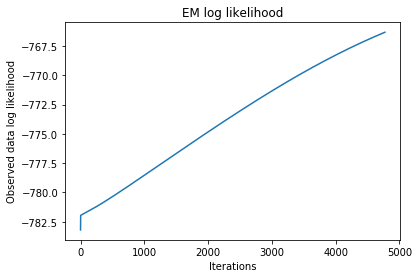

In [133]:
time = [i for i in range(len(em.obs_log_lik))]
plt.plot(time, em.obs_log_lik)
#plt.axhline(y=log_lik_true_param, color='r')
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

In [134]:
def mapd(actual, pred):
    return np.average(np.abs((actual-pred)/actual)) * 100

print('estimated A: {}'.format(em.A))
print('true A: {}'.format(model.A))
print('mean absolute percentage difference of A: {}'.format(mapd(model.A, em.A)))
print('estimated b: {}'.format(em.b))
print('true b: {}'.format(model.b))
print('mean absolute percentage difference of b: {}'.format(mapd(model.b, em.b)))
print('estimated initial state mean: {}'.format(em.init_z))
print('true initial state mean: {}'.format(model.init_z))
print('mean absolute percentage difference of initial state mean: {}'.format(mapd(model.init_z, em.init_z)))
print('estimated sigma_0: {}'.format(em.sigma_0))
print('true sigma_0: {}'.format(model.noise_0))
print('mean absolute percentage difference of initial state variance: {}'.format(mapd(model.noise_0, em.sigma_0)))
print('estimated sigma_1: {}'.format(em.sigma_1))
print('true sigma_1: {}'.format(model.noise_1))
print('mean absolute percentage difference of transition variance: {}'.format(mapd(model.noise_1, em.sigma_1)))
print('estimated sigma_2: {}'.format(em.sigma_2))
print('true sigma_2: {}'.format(model.noise_2))
print('mean absolute percentage difference of observation variance: {}'.format(mapd(model.noise_2, em.sigma_2)))
print('estimated ratio: {}'.format(em.sigma_1/em.sigma_2))
print('true ratio: {}'.format(model.noise_1/model.noise_2))
print('intercept: {}'.format(em.intercept))

estimated A: [[0]]
true A: [[0]]
mean absolute percentage difference of A: nan
estimated b: [15.05577187]
true b: [10]
mean absolute percentage difference of b: 50.557718698464285
estimated initial state mean: 4.251252236244024
true initial state mean: 6
mean absolute percentage difference of initial state mean: 29.145796062599594
estimated sigma_0: 10.950515008772397
true sigma_0: 10
mean absolute percentage difference of initial state variance: 9.505150087723973
estimated sigma_1: 0.8884673893323782
true sigma_1: 1
mean absolute percentage difference of transition variance: 11.153261066762177
estimated sigma_2: 0.05008032188134094
true sigma_2: 0.01
mean absolute percentage difference of observation variance: 400.8032188134094
estimated ratio: 17.740848220534417
true ratio: 100.0
intercept: [-0.42870207]


/home/bear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


ValueError: x and y must have same first dimension, but have shapes (0,) and (66,)

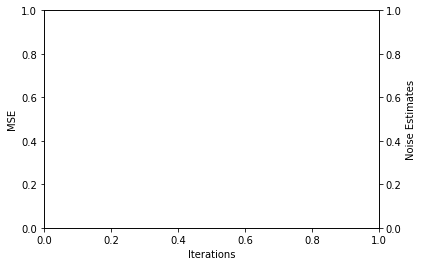

In [8]:
fig, ax1 = plt.subplots()
time = [i for i in range(len(em.mse))]
#ax1.plot(time, em.mse, label='MSE', color='r')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')

ax2 = ax1.twinx()
ax2.set_ylabel('Noise Estimates')
ax2.plot(time, em.params[em.A.shape[1]+em.b.shape[0]+1], label='sigma 0')
ax2.axhline(y=model.noise_2, color='g', linestyle=':', label='true value')

plt.legend()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
time = [i for i in range(len(em.mse))]
ax1.plot(time, em.mse, label='MSE', color='r')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')

ax2 = ax1.twinx()
ax2.set_ylabel('Coefficient Estimates')
color = ['m', 'y']
for i in range(em.A.shape[1]):
    ax2.plot(time, em.params[i], label='Coefficient A {}'.format(i+1))
    ax2.axhline(y=model.A[0, i], linestyle=':', label='true value coeffient A {}'.format(i+1), color=color[i])
for i in range(em.A.shape[1], em.A.shape[1]+em.b.shape[0]):
    ax2.plot(time, em.params[i], label='Coeffient b {}'.format(i+1-em.A.shape[1]))
    ax2.axhline(y=model.b[i-em.A.shape[1]], linestyle=':', label='true value coeffient b')
#for i in range(em.A.shape[1]+em.b.shape[0], len(em.params.keys())):
#    plt.plot(time,)
plt.legend()
plt.show()

In [ ]:
for n in range(10):
    plot(em, n, time_unit=1, true_model=True, model=model, signal_name='simulation', treatment_types=['1', '2'])

In [ ]:
fig, ax1 = plt.subplots()
time = [i for i in range(len(em.mse))]
ax1.plot(time, em.mse, label='MSE', color='r')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')

ax2 = ax1.twinx()
ax2.set_ylabel('Noise Estimates')
ax2.plot(time, em.params[len(em.params.keys())-1], label='sigma 2')
ax2.axhline(y=model.noise_2, color='g', linestyle=':', label='true value')
plt.legend()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
time = [i for i in range(len(em.mse))]
ax1.plot(time, em.mse, label='MSE', color='r')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')

ax2 = ax1.twinx()
ax2.set_ylabel('Noise Estimates')
ax2.plot(time, em.params[em.A.shape[1]+em.b.shape[0]+2], label='sigma 1')
ax2.axhline(y=model.noise_1, color='g', linestyle=':', label='true value')

plt.legend()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
time = [i for i in range(len(em.mse))]
ax1.plot(time, em.mse, label='MSE', color='r')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')

ax2 = ax1.twinx()
ax2.set_ylabel('Initial state mean Estimates')
ax2.plot(time, em.params[em.A.shape[1]+em.b.shape[0]], label='initial state mean')
ax2.axhline(y=model.init_z, color='g', linestyle=':', label='true value')

plt.legend()
plt.show()

In [ ]:
em.obs_log_lik

In [ ]:
time = [i for i in range(len(em.expected_log_lik))]
plt.plot(time, em.expected_log_lik)
#plt.axhline(y=log_lik_true_param, color='r')
plt.xlabel('Iterations')
plt.ylabel('Expected data log likelihood')
plt.title('EM expected log likelihood')
plt.show()

In [ ]:
%%capture
# to debug loglik
for i in range(0):
    model = Model(20, 1, 0.3)
    model.run_simulation()
    em = EM(model.y, model.X, model.c, model.A.shape[0], 0, train_pct = 1, single_effect=False)
    num_iter = em.run_EM(5000)
    #loglik_increase = all([em.expected_log_lik[j] <= em.expected_log_lik[j+1] for j in range(len(em.expected_log_lik)-1)])
    loglik_increase = all([em.obs_log_lik[j] <= em.obs_log_lik[j+1] for j in range(len(em.obs_log_lik)-1)])
    if not loglik_increase:
        break

In [ ]:
i

In [ ]:
time = [i for i in range(len(em.obs_log_lik))]
plt.plot(time, em.obs_log_lik)
#plt.axhline(y=log_lik_true_param, color='r')
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

In [ ]:
#measurements = ma.asarray(model.y)
#measurements[:, np.where(np.isnan(model.y[0, :]))[0]] = ma.masked
measurements = ma.asarray(model.y)
measurements[:, np.where(np.isnan(model.y[0, :]))[0]] = ma.masked

In [ ]:
from pykalman import KalmanFilter
X = np.transpose(measurements)
kf = KalmanFilter(transition_matrices = 1, observation_matrices = 1, initial_state_covariance=em.init_0, initial_state_mean=em.init_state, transition_covariance=em.init_1, observation_covariance=em.init_2)
kf = kf.em(X, n_iter=num_iter, em_vars=['initial_state_mean', 'initial_state_covariance', 'transition_covariance', 'observation_covariance'])

time = [i for i in range(len(kf.loglik))]
plt.plot(time, kf.loglik)
#plt.axhline(y=log_lik_true_param, color='r')
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('pykalman log likelihood')
plt.show()

In [ ]:
all([kf.loglik[j] <= kf.loglik[j+1] for j in range(len(kf.loglik)-1)])

In [ ]:
kf.initial_state_covariance[0][0]

In [ ]:
em.sigma_0

In [ ]:
kf.initial_state_mean[0]

In [ ]:
em.init_z

In [ ]:
kf.transition_covariance[0][0]

In [ ]:
em.sigma_1

In [ ]:
kf.observation_covariance[0][0]

In [ ]:
em.sigma_2

### Last Observation Carry Forward

In [ ]:
# assume the first observation is not nan and the data array is not entirely nan
def LBCF(data):
    filled = np.zeros(data.shape)
    for n in range(data.shape[0]):
        for i, y in enumerate(data[n, :]):
            if np.isnan(y):
                filled[n, i] = filled[n, i-1]
            else:
                filled[n, i] = y
    return filled

### Notes on the current model

1. Identifying coefficients is still somewhat challenging (often off by a little), especially when the noises are larger.
2. When the coefficients are too small i.e. closer to the noise value, the model is unable to recover them.
3. The model has trouble identifying the noise values.  

sigma_filter appears to converge to a value for all t > $t_0$. This replicates the updates equations, where y represents sigma_pred, x represents kgain, z represents sigma_filter. Following iterations, z always converges to one of the roots of the polynomial z^2 + a*z -a*b.